In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
diabetes_dataframe = pd.read_csv("./Clean_diabetes_dataset.csv")
diabetes_dataframe.head()

,Unnamed: 0,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigreeFunction,age,outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,5,5,116,74,0,0,25.6,0.201,30,0


In [43]:
# checking co-relationn 
corr_matrix = diabetes_dataframe.corr()
corr_matrix

,Unnamed: 0,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigreeFunction,age,outcome
Unnamed: 0,1.000000,-0.036976,0.015439,0.028201,0.035387,0.033558,0.038722,-0.011275,0.019538,-0.028682
pregnancies,-0.036976,1.000000,0.142093,0.210666,-0.094425,-0.114510,0.036958,0.009289,0.567438,0.227987
glucose,0.015439,0.142093,1.000000,0.238754,-0.004609,0.248225,0.192504,0.066530,0.286682,0.492740
blood_pressure,0.028201,0.210666,0.238754,1.000000,0.037388,-0.041513,0.303301,0.024290,0.354036,0.183298
skin_thickness,0.035387,-0.094425,-0.004609,0.037388,1.000000,0.487566,0.390340,0.148486,-0.143376,0.030676
insulin,0.033558,-0.114510,0.248225,-0.041513,0.487566,1.000000,0.188635,0.213191,-0.089535,0.097746
bmi,0.038722,0.036958,0.192504,0.303301,0.390340,0.188635,1.000000,0.144757,0.063370,0.269371
diabetes_pedigreeFunction,-0.011275,0.009289,0.066530,0.024290,0.148486,0.213191,0.144757,1.000000,0.030081,0.179072
age,0.019538,0.567438,0.286682,0.354036,-0.143376,-0.089535,0.063370,0.030081,1.000000,0.263344
outcome,-0.028682,0.227987,0.492740,0.183298,0.030676,0.097746,0.269371,0.179072,0.263344,1.000000


In [44]:
corr_matrix['outcome']*100

Unnamed: 0                    -2.868235
pregnancies                   22.798663
glucose                       49.274005
blood_pressure                18.329784
skin_thickness                 3.067563
insulin                        9.774559
bmi                           26.937130
diabetes_pedigreeFunction     17.907250
age                           26.334387
outcome                      100.000000
Name: outcome, dtype: float64

<Axes: >

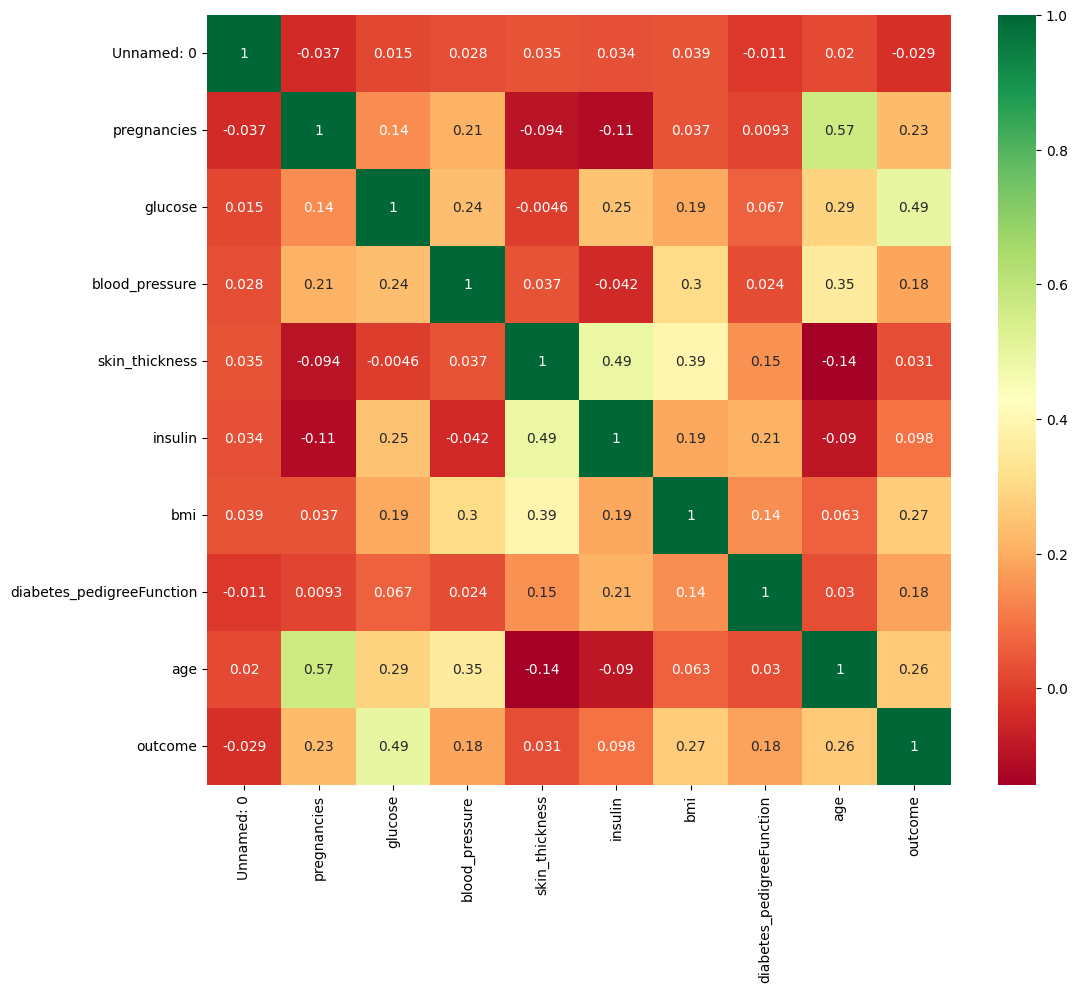

In [45]:
plt.figure(figsize=(12,10))
sns.heatmap(diabetes_dataframe.corr(), annot=True, cmap='RdYlGn')

In [46]:
diabetes_dataframe.drop(columns=["Unnamed: 0","skin_thickness"], inplace=True)

In [47]:
diabetes_dataframe.describe()

,pregnancies,glucose,blood_pressure,insulin,bmi,diabetes_pedigreeFunction,age,outcome
count,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000
mean,3.804382,119.112676,72.120501,65.931142,32.00579,0.429177,32.715180,0.312989
std,3.260995,29.162175,11.348686,79.569482,6.43397,0.250957,11.080651,0.464073
min,0.000000,44.000000,38.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,27.30000,0.242000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,37.000000,32.00000,0.358000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,120.000000,35.95000,0.586000,40.000000,1.000000
max,13.000000,198.000000,106.000000,318.000000,50.00000,1.191000,66.000000,1.000000


In [48]:
X = diabetes_dataframe.drop(['outcome'], axis='columns')
y = diabetes_dataframe.outcome
print(X.shape,y.shape)
print(y)

(639, 7) (639,)
0      1
1      0
2      1
3      0
4      0
      ..
634    0
635    0
636    0
637    1
638    0
Name: outcome, Length: 639, dtype: int64


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)
len(X_train),len(X_test)

(511, 128)

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
print(sc.mean_)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)
print(X_train_sc)
print("----------------------")
print(X_test_sc)

import pickle
with open('scaler_dm.pkl','wb') as f:
    pickle.dump(sc, f)

[  3.86888454 119.79843444  72.47945205  67.6927593   32.08708415
   0.43011155  32.99412916]
[[-8.79417944e-01  1.00420719e+00 -3.93266230e-01 ... -4.28419343e-01
  -3.23522803e-01  8.04213916e-01]
 [-1.18595449e+00  6.94707870e-01 -6.56646365e-01 ...  1.61600306e+00
   3.54370181e-03 -8.03165397e-01]
 [ 3.46728221e-01  7.57092274e-02  1.18701458e+00 ...  4.01646894e-01
  -5.58851142e-01  5.24259398e-04]
 ...
 [-5.72881403e-01 -6.12067043e-01  1.18701458e+00 ...  2.06177937e+00
  -1.20899554e+00 -8.92464248e-01]
 [-2.66344862e-01 -1.30623654e-01  1.33494041e-01 ... -8.89567252e-01
  -1.28876785e+00 -8.03165397e-01]
 [-8.79417944e-01 -9.62348401e-02  1.36260134e+00 ...  3.70903700e-01
  -1.08137544e-01  6.25616214e-01]]
----------------------
[[-2.66344862e-01 -1.26545450e+00 -1.27120001e+00 -6.14592851e-01
   3.40160506e-01 -3.75374810e-01 -7.13866546e-01]
 [-2.66344862e-01 -1.05912162e+00  1.33494041e-01  2.14053447e-01
  -2.59331776e-01  4.82177612e-01  4.47018513e-01]
 [ 1.26633784

In [51]:
X_train_sc = pd.DataFrame(X_train_sc, columns=["pregnancies","glucose","blood_pressure","insulin","bmi","diabetes_pedigree_function","age"])
X_test_sc = pd.DataFrame(X_test_sc, columns=["pregnancies","glucose","blood_pressure","insulin","bmi","diabetes_pedigree_function","age"])
X_train_sc.describe().round()

,pregnancies,glucose,blood_pressure,insulin,bmi,diabetes_pedigree_function,age
count,511.0,511.0,511.0,511.0,511.0,511.0,511.0
mean,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-3.0,-3.0,-1.0,-2.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_samples=0.75, random_state=42)
rf.fit(X_train_sc,y_train)
p = rf.score(X_test_sc,y_test)
print(p*100, "%")

82.8125 %


In [53]:
from sklearn.ensemble import RandomForestClassifier
Score = {}
n_estimators = [10,20,30,50,75]
criterion = ['gini', 'entropy', 'log_loss']
max_features = ['sqrt', 'log2']
for n in n_estimators:
    for c in criterion:
        for mf in max_features:
            model = RandomForestClassifier(n_estimators=n,criterion=c,max_features=mf)
            model.fit(X_train_sc,y_train)
            acc = model.score(X_test_sc,y_test)*100
            Score[n,c,mf] = acc
            
max(Score.values()) # 85.15625
tunedVal = max(Score,key=Score.get)
tunedVal,max(Score.values())

((30, 'entropy', 'log2'), 86.71875)

In [54]:
# # Tuning using GridSearchCV

# # number of trees
# n_estimators = [10,20,30,50,75,100,120]
# # number of features at every split
# max_features = [0.2,0.6,1.0]
# # maximum number of levels
# max_depth = [2,8,None]
# # number of samples
# max_samples = [0.5,0.75,1.0]

# # 5*3*3*3 = 135 different random forest will be trained
# # creating the dict
# param_grid = {
#     'n_estimators': n_estimators,
#     'max_features' : max_features,
#     'max_depth' : max_depth,
#     'max_samples' : max_samples
# }

# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier()

# from sklearn.model_selection import GridSearchCV
# rf_grid = GridSearchCV(
#     estimator=rf, param_grid= param_grid, cv=5, verbose=2, n_jobs=-1
# )
# rf_grid.fit(X_train_sc,y_train)

In [55]:
# print(rf_grid.best_params_)
# print(rf_grid.best_estimator_)
# print(rf_grid.best_score_*100,"%")

In [56]:

model = RandomForestClassifier(n_estimators=50,criterion='log_loss',max_features='log2')
model.fit(X_train_sc,y_train)
model.score(X_test_sc,y_test)*100 # after cleaning -> 74.02597402597402 before cleaning -> 79.6875 after tuning -> 84.375
# best score -> 87.5

83.59375

In [57]:
y_pred = model.predict(X_test_sc)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[84, 13],
       [ 8, 23]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

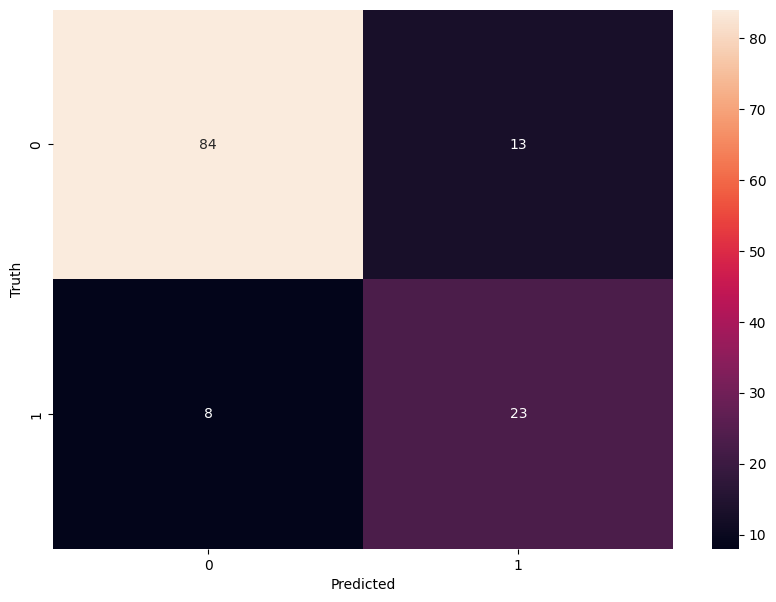

In [58]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
import pickle

In [60]:
filename = 'DM_RandomF.pkl'
pickle.dump(model, open(filename,'wb'))